### Imports

In [1]:
import pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
plt.rcParams.update({'font.size': 16})

### standard values

In [3]:
gate_ct = np.array([ 94, 178, 262, 346, 430, 514, 598, 682, 766, 850], dtype = int)

In [4]:
gate_ctt = gate_ct

In [5]:
#gate_ct = np.array([46, 88, 130, 172, 214, 256, 298, 340, 382, 424], dtype = int)

In [6]:
g_en5 = -7.711545013271975

In [7]:
nseeds = 10

In [8]:
dep = np.arange(1, 11, 1, dtype = int)

In [9]:
#base_expo = [[1,6], [1,5], [5,5], [1,4], [5,4], [1,3], [1,2]]
base_expo = [[1,5], [5,5], [1,4], [5,4], [1,3]]

In [10]:
eps = [b[0]*(10**(-b[1])) for b in base_expo]

In [11]:
perr = []
exp_off = []
for yt in range(len(eps)):
    p_er = np.array(1 - (1-eps[yt])**gate_ct)
    perr.append(perr)
    exp_off.append(1 - p_er)

### noiseless data

In [12]:
#with open('global_noisy_seeds_gates_init/noiseless_COBY_seeds_init.pkl', 'rb') as file:
with open('RYA/noiseless_COBY_seeds_init.pkl', 'rb') as file:
    yruns = pickle.load(file)

In [18]:
res_data_idm = []
res_data_ids = []
val_list_idm = []
val_list_ids = []
for pt in dep:
    yran = []
    ylis = []
    for ht in np.arange(0, nseeds, 1, dtype = int):
        #re = eval(yruns['%s'%ht][pt-1].meta_data['optimization_trace'])
        re = eval(yruns['%s'%ht][pt-1].meta_data['int_energy'])
        vv = yruns['%s'%ht][pt-1].value
        app = [vv for yt in range(20000-len(re))]
        yran.append(re + app)
        ylis.append(vv)
    yseed_opt = np.array(yran)
    yseed_val = np.array(ylis)
    mean_y = np.mean(yseed_opt, axis=0)
    std_y = np.std(yseed_opt, axis=0)
    val = np.mean(yseed_val, axis=0)
    val_sig = np.std(yseed_val, axis=0)
    res_data_idm.append(mean_y)
    res_data_ids.append(std_y)
    val_list_idm.append(val)
    val_list_ids.append(val_sig)

### noisy data

In [19]:
nseeds = 10

In [20]:
noisy_data_mean = {}
noisy_data_std = {}
noisy_data_val_m = {}
noisy_data_val_s = {}
for gt in range(len(base_expo)):
    #with open('global_noisy_seeds_gates_init/noisy-%s_%s.pkl'%(base_expo[gt][0], base_expo[gt][1]), 'rb') as file:
    with open('RYA/COBY_noisy_10_seeds-%s_%s.pkl'%(base_expo[gt][0], base_expo[gt][1]), 'rb') as file:
        res = pickle.load(file)
    res_data_mean = []
    res_data_std = []
    val_list = []
    val_std = []
    for pt in dep:
        yran = []
        ylis = []
        for ht in np.arange(0, nseeds, 1, dtype = int):
            #re = eval(res['%s'%ht][pt-1].meta_data['optimization_trace'])
            re = eval(res['%s'%ht][pt-1].meta_data['int_energy'])
            vv = res['%s'%ht][pt-1].value
            app = [vv for yt in range(20000-len(re))]
            yran.append(re + app)
            ylis.append(vv)
        yseed_opt = np.array(yran)
        yseed_val = np.array(ylis)
        mean_y = np.mean(yseed_opt, axis=0)
        std_y = np.std(yseed_opt, axis=0)
        val = np.mean(yseed_val, axis=0)
        val_sig = np.std(yseed_val, axis=0)
        res_data_mean.append(mean_y)
        res_data_std.append(std_y)
        val_list.append(val)
        val_std.append(val_sig)
    noisy_data_mean['%s'%gt] = res_data_mean
    noisy_data_std['%s'%gt] = res_data_std
    noisy_data_val_m['%s'%gt] = val_list
    noisy_data_val_s['%s'%gt] = val_std

### selected noiseless data plot

In [21]:
# Define exponential model
def exp_model(x, a, b):
    return a * np.exp(-b * x)

C:\Users\a909021\AppData\Local\Temp\ipykernel_20816\2599236198.py:3: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
C:\Users\a909021\.conda\envs\atos\Lib\site-packages\scipy\optimize\_minpack_py.py:526: RuntimeWarning: overflow encountered in multiply
  return transform * (func(xdata, *params) - ydata)
C:\Users\a909021\AppData\Local\Temp\ipykernel_20816\2599236198.py:3: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x)


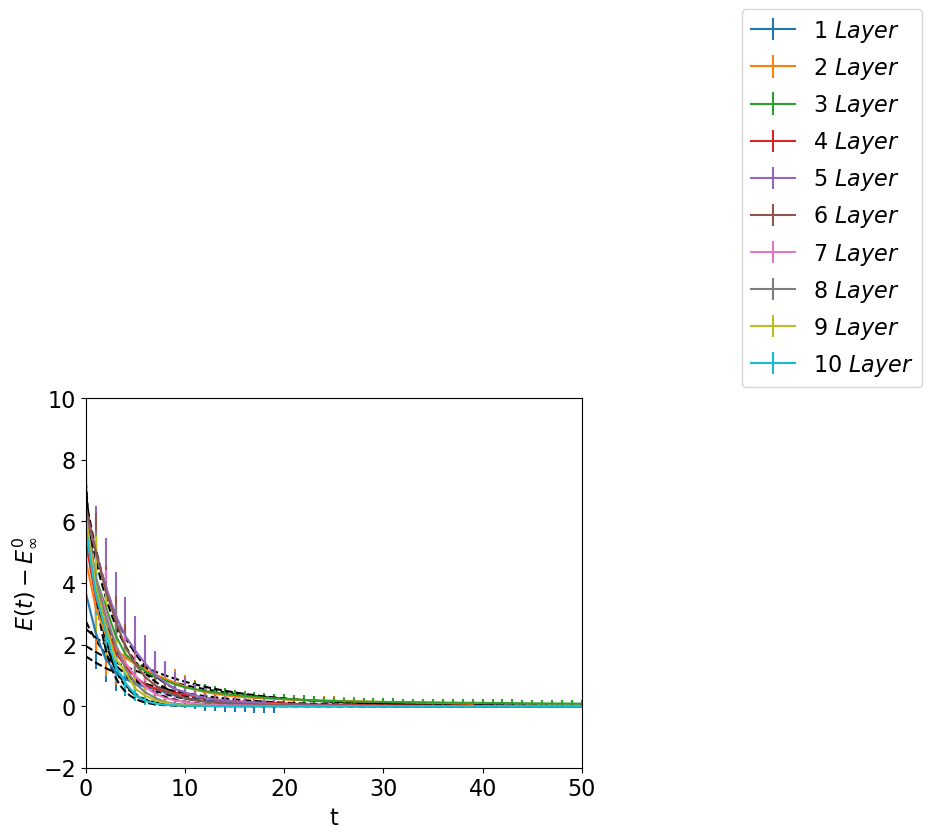

In [22]:
#fitting using the mean data with error propagation
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
gam = []
gam_err = []
xx = np.arange(0, 10000, 1, dtype = int)
fit_ran = 20
for gt in range(0, len(res_data_idm), 1):
#for gt in [0]:
    fit_range = (gt+1)*fit_ran
    yy = np.array(res_data_idm[gt])-val_list_idm[gt]
    xp = xx[0:fit_range]
    yp = yy[0:fit_range]
    std_devs = res_data_ids[gt][0:fit_range]

    # Fit model with weights
    params, cv = curve_fit(exp_model, xp, yp, sigma=std_devs, absolute_sigma=True, full_output = False)
    a, b = params
    a_err, b_err = np.sqrt(np.diag(cv))
    gam_err.append(b_err)
    gam.append(b)
    #y_fit = exp_model(xp, a, b)

    plt.errorbar(xp, yp, yerr=std_devs, fmt='-', label = r'$%s~Layer$' %(gt+1))

    # Plot fitted exponential model
    x_fit = np.linspace(0, 1000, 10000)
    y_fit = exp_model(x_fit, a, b)
    #plt.plot(x_fit, y_fit, '--k', label= r'$F~%s~Layer$' %(gt+1))
    plt.plot(x_fit, y_fit, '--k')

#ax.set_yscale('log')
ax.set_xlabel('t')
ax.set_ylabel(r'$ E(t) - E_{\infty}^0$')
plt.axis([0, 50, -2, 10])
#ax.legend(ncol = 2, bbox_to_anchor = (1, 0.1))
ax.legend(bbox_to_anchor = (1.3,1))
#plt.savefig('LBFGS_plots/noiseless_gamma.pdf', bbox_inches = 'tight')
plt.show()

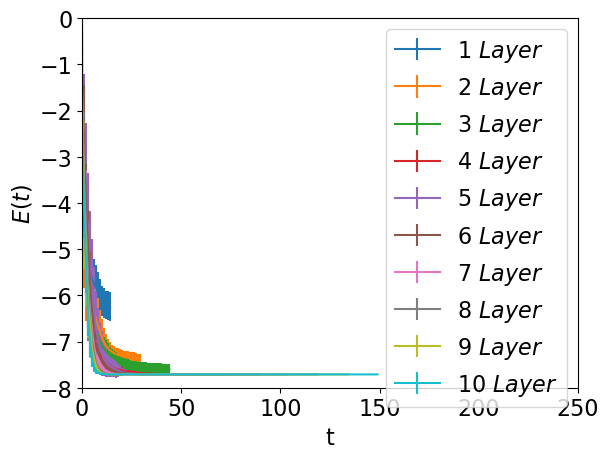

In [23]:
#fitting using the mean data with error propagation
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xx = np.arange(0, 20000, 1, dtype = int)
fit_ran = 15
for gt in range(0, len(res_data_idm), 1):
#for gt in [0]:
    fit_range = (gt+1)*fit_ran
    yy = np.array(res_data_idm[gt])
    xp = xx[0:fit_range]
    yp = yy[0:fit_range]
    std_devs = res_data_ids[gt][0:fit_range]

    plt.errorbar(xp, yp, yerr=std_devs, fmt='-', label = r'$%s~Layer$' %(gt+1))

#ax.set_yscale('log')
ax.set_xlabel('t')
ax.set_ylabel(r'$ E(t)$')
plt.axis([0, 250, -8, 0])
#ax.legend(ncol = 2, bbox_to_anchor = (1, 0.1))
ax.legend()
#plt.savefig('noiseless_gamma.pdf', bbox_inches = 'tight')
plt.show()

### fitting convergence rate

In [24]:
n_lay = 10

In [25]:
# Define power law
def power_model(x, a, b):
    return a * ((x)**-b)

In [26]:
strt = 1

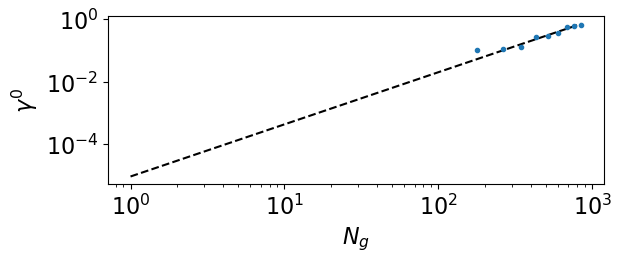

In [27]:
#fitting power law on noiseless gamma
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
plt.errorbar(gate_ctt[strt:n_lay], gam[strt:n_lay], yerr=gam_err[strt:n_lay], fmt='.')
#pfit, cv  = np.polyfit(gate_ct[0:n_lay], np.log(gam[0:n_lay]), w = 1/np.sqrt(gam_err[0:n_lay]), deg=1, cov = True)

#Fit model with weights
pm, cv = curve_fit(power_model, gate_ctt[strt:n_lay], gam[strt:n_lay], sigma=gam_err[strt:n_lay], absolute_sigma=True)
a, b = pm
a_err, b_err = np.sqrt(np.diag(cv))
#Plot fitted exponential model
x_fit = np.linspace(1, gate_ctt[n_lay-1], 100)
y_fit = power_model(x_fit, a, b)
#plt.plot(x_fit, y_fit)

y_fitt = power_model(gate_ctt[strt:n_lay], a, b)

residuals = np.array(gam[strt:n_lay]) - y_fitt
chi_sq = np.sum(np.divide(residuals, np.array(gam_err[strt:n_lay])))
ss_res = np.sum(residuals**2)
ss_tot = np.sum(( np.array(gam[strt:n_lay])-np.mean( np.array(gam[strt:n_lay])))**2)
r_sq = 1 - (ss_res / ss_tot)

# Create sequence of 100 numbers from 0 to 100 
#xn = np.linspace(1, gate_ct[n_lay-1], num=50)

# Plot regression line
ax.plot(x_fit, y_fit, '--k', lw=1.5);
ax.set_xlabel(r'$N_g$')
ax.set_xticks(gate_ctt)
ax.set_ylabel(r'$ \gamma^0$')
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([50,1000])
#ax.set_ylim([0.005,0.5])
#plt.savefig('LBFGS_plots/noiseless_gamma_fit.pdf', bbox_inches = 'tight')
plt.show()

In [28]:
print(a, a_err, b, b_err)

9.134928946032128e-06 2.574720149737325e-06 -1.672680666192142 0.04383384034583705


In [29]:
print(r_sq, chi_sq)

0.9649905378712427 3.6924411813370357


### selected noisy data plot

In [30]:
sel = 3

In [31]:
base_expo[sel]

[5, 4]

In [32]:
res_data_mean = noisy_data_mean['%s'%sel]
res_data_std = noisy_data_std['%s'%sel]
val_list = noisy_data_val_m['%s'%sel]

In [33]:
# Define exponential model
def exp_model(x, a, b):
    return a * np.exp(-b * x)

C:\Users\a909021\AppData\Local\Temp\ipykernel_20816\2599236198.py:3: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
C:\Users\a909021\AppData\Local\Temp\ipykernel_20816\2599236198.py:3: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x)


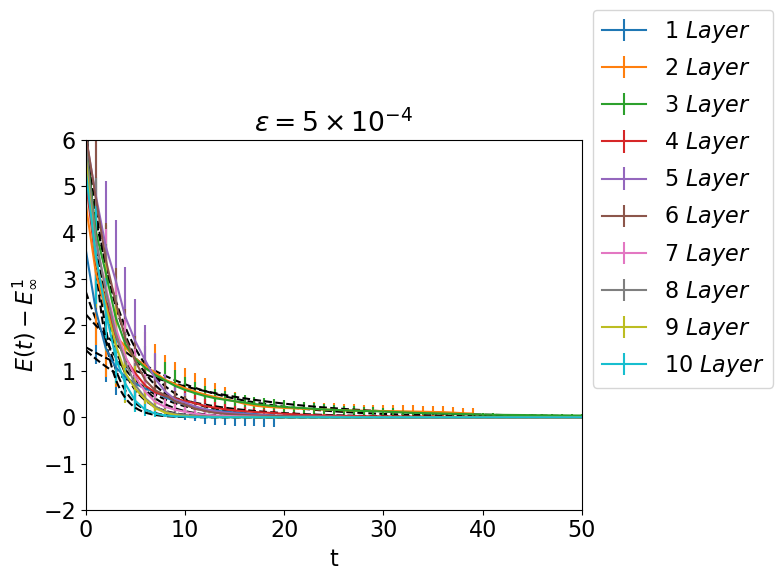

In [40]:
#fitting using the mean data with error propagation
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
alp = []
alp_err = []
E00 = []
E00_err = []
xx = np.arange(0, 10000, 1, dtype = int)
fit_ran = 20
for gt in range(0, len(res_data_mean), 1):
#for gt in [4]:
    fit_range = (gt+1)*fit_ran
    yy = np.array(res_data_mean[gt])-val_list[gt]
    xp = xx[0:fit_range]
    yp = yy[0:fit_range]
    std_devs = res_data_std[gt][0:fit_range]

    # Fit model with weights
    params, cv = curve_fit(exp_model, xp, yp, sigma=std_devs, absolute_sigma=True)
    a, b = params
    a_err, b_err = np.sqrt(np.diag(cv))
    alp_err.append(b_err)
    alp.append(b)
    E00.append(a)
    E00_err.append(a_err)
    #y_fit = exp_model(xp, a, b)

    plt.errorbar(xp, yp, yerr=std_devs, fmt='-', label = r'$%s~Layer$' %(gt+1))

    # Plot fitted exponential model
    x_fit = np.linspace(0, 1000, 10000)
    y_fit = exp_model(x_fit, a, b)
    #plt.plot(x_fit, y_fit, '--k', label= r'$F~%s~Layer$' %(gt+1))
    plt.plot(x_fit, y_fit, '--k')

plt.title(r'$\epsilon = %s \times 10^{-%s}$'%(base_expo[sel][0], base_expo[sel][1]))
#ax.set_yscale('log')
ax.set_xlabel('t')
ax.set_ylabel(r'$ E(t) - E_{\infty}^1$')
plt.axis([0, 50, -2, 6])
#ax.legend(ncol = 2, bbox_to_anchor = (1, 0.1))
ax.legend(bbox_to_anchor = (1, 0.3))
#plt.savefig('LBFGS_plots/noisy_alpha.pdf', bbox_inches = 'tight')
plt.show()

In [41]:
E00

[2.7219234161781225,
 2.230632623301994,
 1.5168502808712585,
 1.4558746154885702,
 5.622762137583285,
 6.147827545550819,
 5.555538565433083,
 6.288237398501945,
 6.598043232965725,
 6.707311574019489]

In [42]:
E00_err

[0.8018952054246058,
 0.5712520335290459,
 0.22445789259274654,
 0.2698304485822094,
 0.9122806947656819,
 0.6123242309630953,
 0.6073847462389798,
 0.8823724710858539,
 0.9980126568046899,
 1.009277201106994]

In [43]:
alp

[0.24327884591847726,
 0.11363610505937907,
 0.0816744963471482,
 0.13866004592795295,
 0.26517107108359106,
 0.3107069537028422,
 0.3718223686470001,
 0.4735117896049025,
 0.6110894278097286,
 0.6950395522306512]

In [44]:
alp_err

[0.06332655668568078,
 0.016618330356256716,
 0.0055881838241613555,
 0.007286101354825059,
 0.017239454419954257,
 0.012869877388210183,
 0.012745918010804366,
 0.0198882117349212,
 0.016482225689802402,
 0.02247668971593142]

### fitting starting value E00

In [45]:
# Define exponential model
def exp_model(x, a, b):
    return a * np.exp(b * x)

In [46]:
# Define exponential model
def lin_model(x, a, b):
    return a * x + b

In [47]:
# Define power law
def power_model(x, a, b):
    return a * ((x)**b)

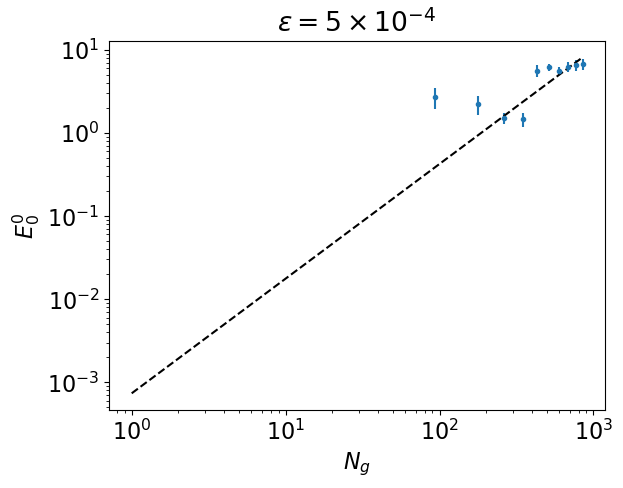

In [48]:
#fitting power law on noiseless gamma
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#plt.plot(gate_ctt[0:n_lay], np.array(val_list_idm[0:n_lay]) - g_en5, 'o')
plt.errorbar(gate_ctt[0:n_lay], np.array(E00), yerr = np.array(E00_err), fmt='.')
#pfit, cv  = np.polyfit(gate_ct[0:n_lay], np.log(gam[0:n_lay]), w = 1/np.sqrt(gam_err[0:n_lay]), deg=1, cov = True)

#Fit model with weights
pm, cv = curve_fit(power_model, gate_ctt[0:n_lay], E00, sigma=E00_err, absolute_sigma=True)
#pm, cv = curve_fit(lin_model, gate_ctt[0:n_lay], np.log(E00), sigma=np.divide(E00_err, np.array(E00)), absolute_sigma=True)
a, b = pm
a_er, b_er = np.sqrt(np.diag(cv))

#Plot fitted exponential model
x_fit = np.linspace(1, gate_ctt[n_lay-1], 100)
#y_fit = exp_model(x_fit, np.exp(b), a)
y_fit = power_model(x_fit, a, b)

#a_err = np.exp(b_er)
#b_err = a_er

#y_fitt = exp_model(gate_ctt[0:n_lay], np.exp(b), a)
y_fitt = power_model(gate_ctt[0:n_lay], a, b)


residuals = np.array(E00) - y_fitt
chi_sq = np.sum(np.divide(residuals, np.array(E00_err)))
ss_res = np.sum(residuals**2)
ss_tot = np.sum(np.array(E00)-np.mean(np.array(E00))**2)
r_sq = 1 - (ss_res / ss_tot)

# Create sequence of 100 numbers from 0 to 100 
#xn = np.linspace(1, gate_ct[n_lay-1], num=50)

# Plot regression line
ax.plot(x_fit, y_fit, '--k', lw=1.5);
ax.set_xlabel(r'$N_g$')
ax.set_xticks(gate_ctt)
ax.set_ylabel(r'$E_{0}^0$')
plt.title( r'$\epsilon = %s \times 10^{-%s}$'%(base_expo[sel][0], base_expo[sel][1]))
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([50,900])
#ax.set_ylim([-0.1, 1])
#plt.savefig('noiseless_conv_en_fit.pdf', bbox_inches = 'tight')
plt.show()

In [94]:
r_sq

1.02919287226027

In [95]:
a

11.49151250632787

In [96]:
b

-0.09763320656099227

### fitting noisy $\alpha$

In [97]:
n_lay = 10

In [98]:
# Define power law
def power_model(x, a, b):
    return a * ((x)**-b)

In [99]:
strt = 1

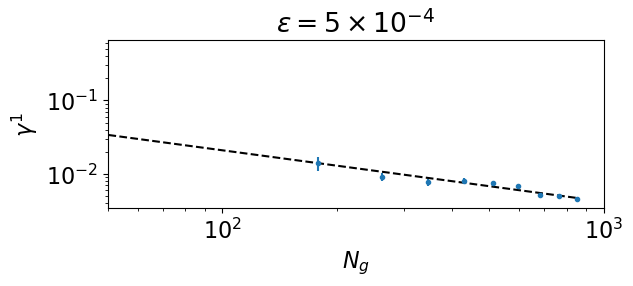

In [100]:
#fitting power law on noisy alpha
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
plt.errorbar(gate_ctt[strt:n_lay], alp[strt:n_lay], yerr=alp_err[strt:n_lay], fmt='.')
#pfit, cv  = np.polyfit(gate_ct[0:n_lay], np.log(gam[0:n_lay]), w = 1/np.sqrt(gam_err[0:n_lay]), deg=1, cov = True)

#Fit model with weights
pm, cv = curve_fit(power_model, gate_ctt[strt:n_lay], alp[strt:n_lay], sigma=alp_err[strt:n_lay], absolute_sigma=True)
a, b = pm
a_err, b_err = np.sqrt(np.diag(cv))
#Plot fitted exponential model
x_fit = np.linspace(1, gate_ctt[n_lay-1], 100)
y_fit = power_model(x_fit, a, b)
#plt.plot(x_fit, y_fit)

y_fitt = power_model(gate_ctt[strt:n_lay], a, b)

residuals = np.array(alp[strt:n_lay]) - y_fitt
chi_sq = np.sum(np.divide(residuals, np.array(alp_err[strt:n_lay])))
ss_res = np.sum(residuals**2)
ss_tot = np.sum(( np.array(alp[strt:n_lay])-np.mean(np.array(alp[strt:n_lay])))**2)
r_sq = 1 - (ss_res / ss_tot)

# Create sequence of 100 numbers from 0 to 100 
#xn = np.linspace(1, gate_ct[n_lay-1], num=50)

# Plot regression line
ax.plot(x_fit, y_fit, '--k', lw=1.5);
ax.set_xlabel(r'$N_g$')
ax.set_xticks(gate_ctt)
ax.set_ylabel(r'$ \gamma^1$')
#plt.savefig('noiseless_gamma_fit.pdf', bbox_inches = 'tight')
plt.title( r'$\epsilon = %s \times 10^{-%s}$'%(base_expo[sel][0], base_expo[sel][1]))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([50,1000])
#ax.set_ylim([0.005,0.5])
plt.show()

In [101]:
print(a, a_err, b, b_err)

0.5228405614367597 0.2129474459556763 0.6986602021724263 0.06317171458686906


In [102]:
print(r_sq, chi_sq)

0.9250471341277244 -0.4019459690267506


### for all $\epsilon$

In [103]:
# Define exponential model
def exp_model(x, a, b):
    return a * np.exp(-b * x)

In [104]:
alp_list = []
alp_err_list = []
xx = np.arange(0, 10000, 1, dtype = int)
fit_ran = 15
for gt in range(len(base_expo)):
    res_data_mean = noisy_data_mean['%s'%gt]
    res_data_std = noisy_data_std['%s'%gt]
    val_list = noisy_data_val_m['%s'%gt]
    #fitting using the mean data with error propagation
    alp = []
    alp_err = []
    for gt in range(0, len(res_data_mean), 1):
        fit_range = (gt+1)*fit_ran
        yy = np.array(res_data_mean[gt])-val_list[gt]
        xp = xx[0:fit_range]
        yp = yy[0:fit_range]
        std_devs = res_data_std[gt][0:fit_range]
        # Fit model with weights
        params, cv = curve_fit(exp_model, xp, yp, sigma=std_devs, absolute_sigma=True)
        a, b = params
        a_err, b_err = np.sqrt(np.diag(cv))
        alp_err.append(b_err)
        alp.append(b)
    alp_list.append(alp)
    alp_err_list.append(alp_err)

C:\Users\a909021\AppData\Local\Temp\ipykernel_10000\2599236198.py:3: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
C:\Users\a909021\AppData\Local\Temp\ipykernel_10000\2599236198.py:3: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x)


In [105]:
import itertools
marker = itertools.cycle(('o', 'v', 's', 'd', '*', '^', 'x', 'p')) 

In [106]:
# Define fit model
def power_model(x, a, b):
    #return a * np.exp(-b * x)
    return a * ((x)**b)

In [107]:
strt = 1

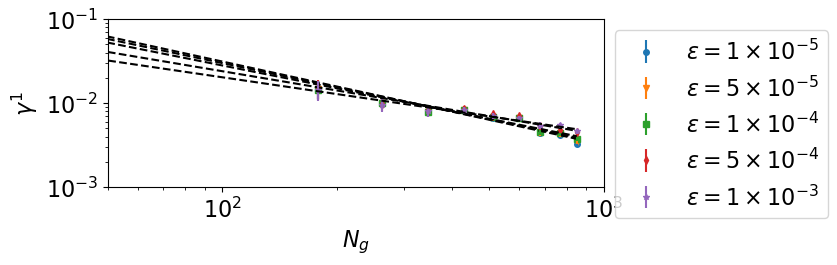

In [108]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
resi = []
rsq = []
csq = []
alp_err_fit = []
alp_fit = []
bet_err_fit = []
bet_fit = []
for gt in range(len(alp_list)):
    plt.errorbar(gate_ctt[strt:n_lay], alp_list[gt][strt:n_lay], yerr=alp_err_list[gt][strt:n_lay], fmt = next(marker), markersize=4, barsabove = True, label = r'$\epsilon = %s \times 10^{-%s}$'%(base_expo[gt][0], base_expo[gt][1]))
    #pfit, cv  = np.polyfit(gate_ct[0:n_lay], np.log(gam[0:n_lay]), w = 1/np.sqrt(gam_err[0:n_lay]), deg=1, cov = True)
        
    #Fit model with weights
    pm, cv = curve_fit(power_model, gate_ctt[strt:n_lay], alp_list[gt][strt:n_lay], sigma=alp_err_list[gt][strt:n_lay], absolute_sigma=True)
    a, b = pm
    a_err, b_err = np.sqrt(np.diag(cv))
    #Plot fitted exponential model
    x_fit = np.linspace(1, gate_ctt[n_lay-1], 100)
    y_fit = power_model(x_fit, a, b)
    #plt.plot(x_fit, y_fit)
    
    y_fitt = power_model(gate_ctt[strt:n_lay], a, b)
    
    residuals = np.array(alp_list[gt][strt:n_lay]) - y_fitt
    chi_sq = np.sum(np.divide(residuals, np.array(alp_err_list[gt][strt:n_lay])))
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum(( np.array(alp_list[gt][strt:n_lay])-np.mean(np.array(alp_list[gt][strt:n_lay])))**2)
    r_sq = 1 - (ss_res / ss_tot)

    resi.append(residuals)
    rsq.append(r_sq)
    csq.append(chi_sq)

    alp_err_fit.append(a_err)
    bet_err_fit.append(b_err)
    alp_fit.append(a)
    bet_fit.append(b)
    
    # Create sequence of 100 numbers from 0 to 100 
    #xn = np.linspace(1, gate_ct[n_lay-1], num=50)
    
    # Plot regression line
    ax.plot(x_fit, y_fit, '--k', lw=1.5);
ax.set_xlabel(r'$N_g$')
ax.set_xticks(gate_ctt)
    
#plt.savefig('noiseless_gamma_fit.pdf', bbox_inches = 'tight')
plt.legend(bbox_to_anchor = (1, 1))
ax.set_ylabel(r'$ \gamma^1$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([50,1000])
ax.set_ylim([0.001,0.1])
#plt.savefig('LBFGS_plots/noisy_alpha_fit.pdf', bbox_inches = 'tight')
plt.show()

In [109]:
alp_fit

[2.991046623721974,
 2.426404890340086,
 1.8157460955956393,
 0.8052559679287898,
 0.4338201732617255]

In [110]:
alp_err_fit

[1.551382598834399,
 1.2504161396727915,
 0.9302760342580275,
 0.41007030329794875,
 0.24449817632281629]

In [111]:
bet_fit

[-0.9903676758260413,
 -0.9543471052941233,
 -0.9054726279919841,
 -0.7631389676920065,
 -0.6649335497305011]

In [112]:
bet_err_fit

[0.08115981009331581,
 0.0805063886396699,
 0.07987689572593863,
 0.07912070482571192,
 0.0875653624775548]

In [113]:
rsq

[0.8386667038333925,
 0.8460770051625365,
 0.8678479651819844,
 0.9303866364237744,
 0.9542131695089829]

In [114]:
csq

[-0.6329396169601811,
 -0.6416771206998844,
 -0.6104581535585585,
 -0.47951222344582645,
 -0.3123856331034335]

In [115]:
np.mean(alp_fit)

1.694454750169643

In [116]:
np.mean(alp_err_fit)

0.8773286504771965

In [117]:
np.mean(bet_fit)

-0.8556519853069313

In [118]:
np.mean(bet_err_fit)

0.08164583235243822

In [119]:
strt = 1

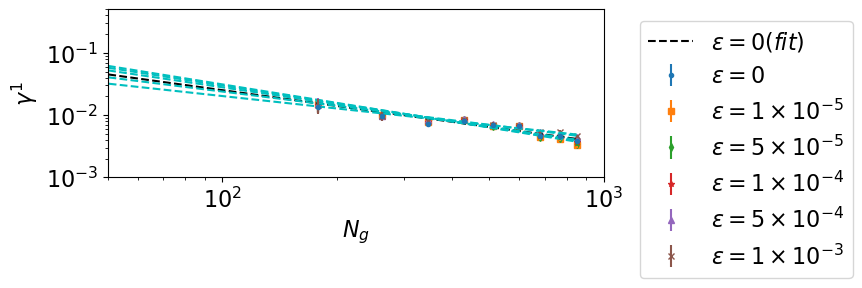

In [121]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
resi = []
rsq = []
csq = []
alp_err_fit = []
alp_fit = []
bet_err_fit = []
bet_fit = []

plt.errorbar(gate_ctt[strt:n_lay], gam[strt:n_lay], yerr=gam_err[strt:n_lay], fmt='.',  label = r'$\epsilon = 0$')
#pfit, cv  = np.polyfit(gate_ct[0:n_lay], np.log(gam[0:n_lay]), w = 1/np.sqrt(gam_err[0:n_lay]), deg=1, cov = True)

#Fit model with weights
pm, cv = curve_fit(power_model, gate_ctt[strt:n_lay], gam[strt:n_lay], sigma=gam_err[strt:n_lay], absolute_sigma=True)
a, b = pm
a_err, b_err = np.sqrt(np.diag(cv))
#Plot fitted exponential model
x_fit = np.linspace(1, gate_ctt[n_lay-1], 100)
y_fit = power_model(x_fit, a, b)
#plt.plot(x_fit, y_fit)

y_fitt = power_model(gate_ctt[strt:n_lay], a, b)

resi_0 = np.array(gam[strt:n_lay]) - y_fitt
chi_sq_0 = np.sum(np.divide(resi_0, np.array(gam_err[strt:n_lay])))
ss_res_0 = np.sum(resi_0**2)
ss_tot_0 = np.sum(( np.array(gam[strt:n_lay])-np.mean( np.array(gam[strt:n_lay])))**2)
r_sq_0 = 1 - (ss_res_0 / ss_tot_0)

# Create sequence of 100 numbers from 0 to 100 
#xn = np.linspace(1, gate_ct[n_lay-1], num=50)

# Plot regression line
ax.plot(x_fit, y_fit, '--k', lw=1.5, label = r'$\epsilon = 0 (fit)$');

for gt in range(len(alp_list)):
    plt.errorbar(gate_ctt[strt:n_lay], alp_list[gt][strt:n_lay], yerr=alp_err_list[gt][strt:n_lay], fmt = next(marker), markersize=4, barsabove = True, label = r'$\epsilon = %s \times 10^{-%s}$'%(base_expo[gt][0], base_expo[gt][1]))
    #pfit, cv  = np.polyfit(gate_ct[0:n_lay], np.log(gam[0:n_lay]), w = 1/np.sqrt(gam_err[0:n_lay]), deg=1, cov = True)
        
    #Fit model with weights
    pm, cv = curve_fit(power_model, gate_ctt[strt:n_lay], alp_list[gt][strt:n_lay], sigma=alp_err_list[gt][strt:n_lay], absolute_sigma=True)
    a, b = pm
    a_err, b_err = np.sqrt(np.diag(cv))
    #Plot fitted exponential model
    x_fit = np.linspace(1, gate_ctt[n_lay-1], 100)
    y_fit = power_model(x_fit, a, b)
    #plt.plot(x_fit, y_fit)
    
    y_fitt = power_model(gate_ctt[strt:n_lay], a, b)
    
    residuals = np.array(alp_list[gt][strt:n_lay]) - y_fitt
    chi_sq = np.sum(np.divide(residuals, np.array(alp_err_list[gt][strt:n_lay])))
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((np.array(alp_list[gt][strt:n_lay])-np.mean(np.array(alp_list[gt][strt:n_lay])))**2)
    r_sq = 1 - (ss_res / ss_tot)

    resi.append(residuals)
    rsq.append(r_sq)
    csq.append(chi_sq)

    alp_err_fit.append(a_err)
    bet_err_fit.append(b_err)
    alp_fit.append(a)
    bet_fit.append(b)
    
    # Create sequence of 100 numbers from 0 to 100 
    #xn = np.linspace(1, gate_ct[n_lay-1], num=50)
    
    # Plot regression line
    ax.plot(x_fit, y_fit, '--c', lw=1.5);
ax.set_xlabel(r'$N_g$')
ax.set_xticks(gate_ctt)
    
#plt.savefig('noiseless_gamma_fit.pdf', bbox_inches = 'tight')
plt.legend(bbox_to_anchor = (1.05, 1))
ax.set_ylabel(r'$ \gamma^1$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([50,1000])
ax.set_ylim([0.001,0.5])
plt.savefig('noisy_alpha_fit_LBFGS.pdf', bbox_inches = 'tight')
plt.show()

### difference in E(t) noisy and noiseless

In [122]:
xx = np.arange(1, 20001, 1, dtype =int)

In [123]:
sel = 0

-0.010884918305779489
0.03863052322494453
-0.005242913057279773
0.006060475811629997
0.002489111237661759
-0.001148874490925119
0.00011267849244829003
0.0006571242113492147
8.94933173403105e-05
-0.001254328189426213


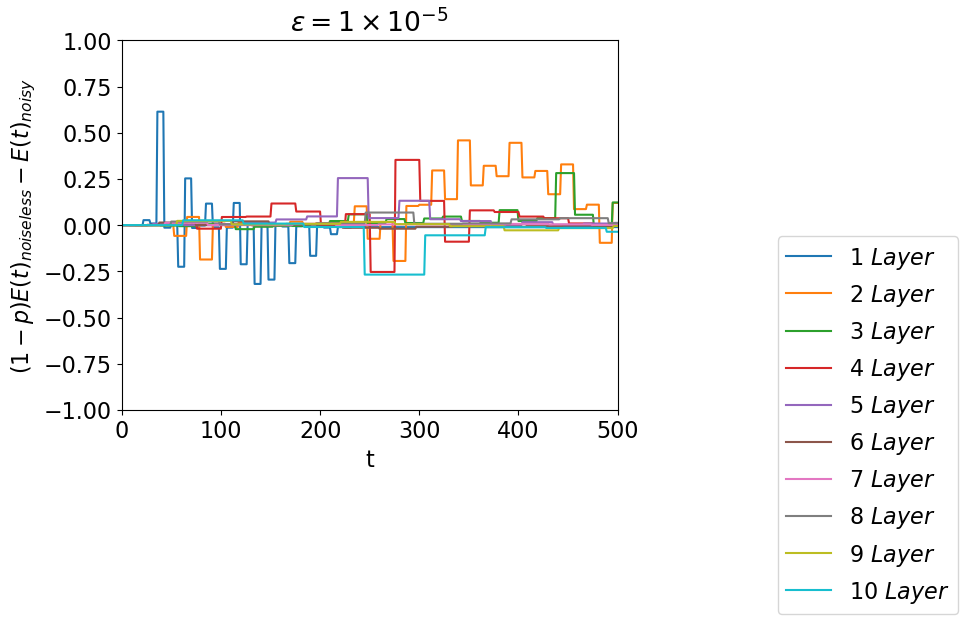

In [124]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for gt in dep:
    diff = np.multiply(exp_off[sel][gt-1], np.array(res_data_idm[gt-1]))- np.array(noisy_data_mean['%s'%sel][gt-1])
    #print(np.multiply(exp_off[sel][gt-1], res_data_idm[gt-1][-1]) - np.min(res_data_mean[gt-1]))
    #diff = np.multiply(exp_off[sel][gt-1]*np.ones(len(res_data_idm[gt-1])), np.array(res_data_idm[gt-1]))- np.array(res_data_mean[gt-1])
    print(np.mean(diff))
    ax.plot(xx,diff, label = r'$%s~Layer$' %(gt))
ax.set_xlabel('t')
ax.set_ylabel(r'$ (1-p)E(t)_{noiseless}- E(t)_{noisy}$')
ax.legend(ncol = 1, bbox_to_anchor = (1.3, 0.5))
plt.axis([0, 500, -1, 1])
#ax.set_yscale('log')
plt.title( r'$\epsilon = %s \times 10^{-%s}$'%(base_expo[sel][0], base_expo[sel][1]))
#plt.savefig('opt_trace_diff.pdf', bbox_inches = 'tight')
plt.show()

### difference in $E_\infty$ noisy and noiseless

C:\Users\a909021\AppData\Local\Temp\ipykernel_10000\1582498224.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axx.set_xticklabels(gate_ct)


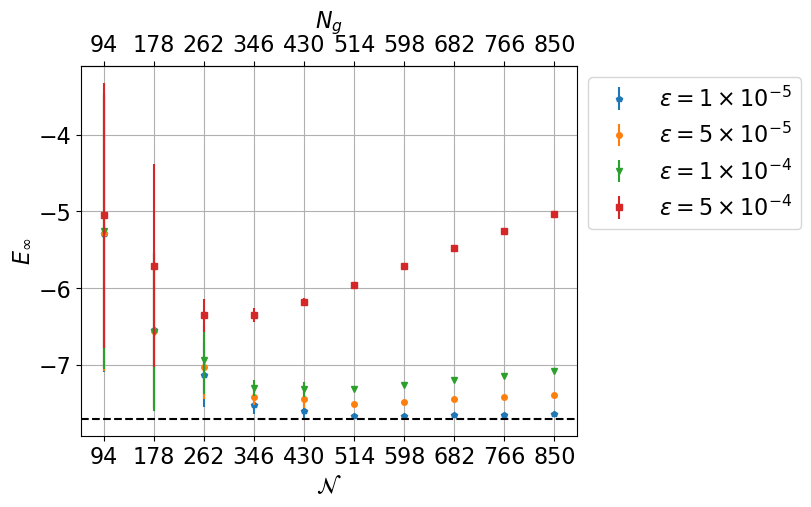

In [125]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for rt in range(len(base_expo)-1):
    plt.errorbar(gate_ct, np.array(noisy_data_val_m['%s'%rt]), yerr = noisy_data_val_s['%s'%rt], fmt = next(marker), markersize=4, barsabove = True, label = r'$\epsilon = %s \times 10^{-%s}$'%(base_expo[rt][0], base_expo[rt][1]))
    #ax.plot(gate_ct, np.multiply(exp_off[rt], val_list_id), label = r'$\epsilon = %s \times 10^%s$'%(base_expo[rt][0], base_expo[rt][1]))
    #diff =  np.multiply(exp_off[rt], val_list_id) - np.array(noisy_data_val['%s'%rt])
    #ax.plot(gate_ct, diff, label = r'$\epsilon = %s \times 10^%s$'%(base_expo[rt][0], base_expo[rt][1]))
ax.set_xlabel(r'$\mathcal{N}$')
ax.set_ylabel(r'$ E_\infty$')
ax.set_xticks(gate_ct)
axx = ax.secondary_xaxis('top')
axx.set_xticklabels(gate_ct)
axx.set_xlabel(r'$N_g$')
axx.set_xticks(gate_ct)
axx.set_xticklabels(gate_ctt)
plt.axhline(g_en5, color = 'k', xmin = 0, xmax = 500, linestyle = '--')
plt.legend(bbox_to_anchor = (1, 1))
#ax.set_yscale('log')
plt.grid()
#plt.savefig('noisy_noiseless_conv.pdf', bbox_inches = 'tight')
plt.show()

C:\Users\a909021\AppData\Local\Temp\ipykernel_10000\1224036363.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axx.set_xticklabels(gate_ct)


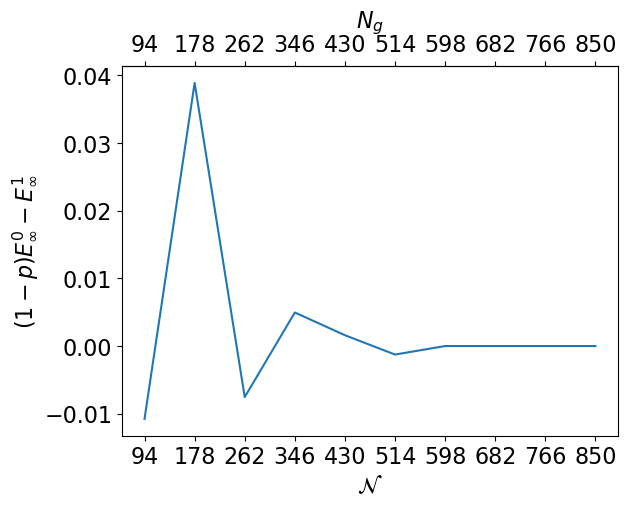

In [126]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
diff = np.multiply(np.array(exp_off[sel]), np.array(val_list_idm)) - np.array(noisy_data_val_m['%s'%sel])
ax.plot(gate_ct, diff)
ax.set_xlabel('$\mathcal{N}$')
ax.set_ylabel(r'$ (1-p)E_{\infty}^0 - E_{\infty}^1$')
ax.set_xticks(gate_ct)
axx = ax.secondary_xaxis('top')
axx.set_xticklabels(gate_ct)
axx.set_xlabel(r'$N_g$')
axx.set_xticks(gate_ct)
axx.set_xticklabels(gate_ctt)
#ax.legend(ncol = 2, bbox_to_anchor = (1.5, 0.25))
#plt.axis([0, 5000, -0.5, 0.5])
#ax.set_yscale('log')
plt.show()

### $E_\infty$ as a function of $\mathcal{N}$

In [127]:
import itertools
marker = itertools.cycle(('o-', 'v-', 's-', 'd-', '*-', '^-', 'x-', 'p-')) 

C:\Users\a909021\AppData\Local\Temp\ipykernel_10000\4289177660.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axx.set_xticklabels(gate_ct)


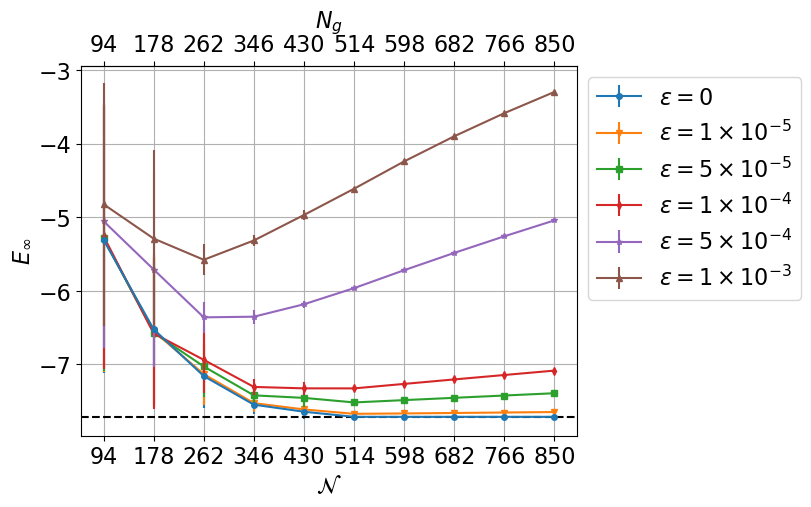

In [128]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.plot(gate_ct, val_list_id, label = r'$\epsilon = 0$')
plt.errorbar(gate_ct, val_list_idm, yerr = val_list_ids, fmt = next(marker), markersize=4, label = r'$\epsilon = 0$')
for rt in range(len(base_expo)):
    #ax.plot(gate_ct, np.array(noisy_data_val['%s'%rt]), label = r'$\epsilon = %s \times 10^%s$'%(base_expo[rt][0], base_expo[rt][1]))
    yer = noisy_data_val_s['%s'%rt]
    plt.errorbar(gate_ct, np.array(noisy_data_val_m['%s'%rt]), yerr = yer, fmt = next(marker), markersize=4, barsabove = True, label = r'$\epsilon = %s \times 10^{-%s}$'%(base_expo[rt][0], base_expo[rt][1]))
    #ax.plot(gate_ct, np.multiply(exp_off[rt], val_list_id), label = r'$\epsilon = %s \times 10^%s$'%(base_expo[rt][0], base_expo[rt][1]))
    #diff =  np.multiply(exp_off[rt], val_list_id) - np.array(noisy_data_val['%s'%rt])
    #ax.plot(gate_ct, diff, label = r'$\epsilon = %s \times 10^%s$'%(base_expo[rt][0], base_expo[rt][1]))
ax.set_xlabel(r'$\mathcal{N}$')
ax.set_ylabel(r'$ E_\infty$')
ax.set_xticks(gate_ct)
axx = ax.secondary_xaxis('top')
axx.set_xticklabels(gate_ct)
axx.set_xlabel(r'$N_g$')
axx.set_xticks(gate_ct)
axx.set_xticklabels(gate_ctt)
plt.axhline(g_en5, color = 'k', xmin = 0, xmax = 500, linestyle = '--')
plt.legend(bbox_to_anchor = (1, 1))
#ax.set_yscale('log')
plt.grid()
plt.savefig('noisy_noiseless_conv_LBFGS.pdf', bbox_inches = 'tight')
plt.show()

In [129]:
n_lay = 10

In [130]:
# Define exponential model
def exp_model(x, a, b):
    return a * np.exp(b * x)

In [131]:
# Define exponential model
def lin_model(x, a, b):
    return a * x + b

In [132]:
strt = 0
stop = 6

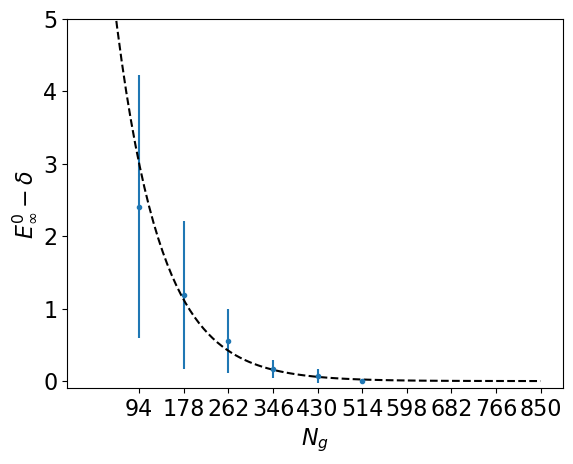

In [133]:
#fitting power law on noiseless gamma
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#plt.plot(gate_ctt[0:n_lay], np.array(val_list_idm[0:n_lay]) - g_en5, 'o')
plt.errorbar(gate_ctt[strt:stop], np.array(val_list_idm[strt:stop]) - g_en5, yerr = val_list_ids[strt:stop], fmt='.')
#pfit, cv  = np.polyfit(gate_ct[0:n_lay], np.log(gam[0:n_lay]), w = 1/np.sqrt(gam_err[0:n_lay]), deg=1, cov = True)

#Fit model with weights
#pm, cv = curve_fit(lin_model, gate_ctt[0:n_lay], np.log(np.array(val_list_idm[0:n_lay]) - g_en5))
pm, cv = curve_fit(lin_model, gate_ctt[strt:stop], np.log(np.array(val_list_idm[strt:stop]) - g_en5), sigma=np.divide(val_list_ids[strt:stop], np.array(val_list_idm[strt:stop]) - g_en5), absolute_sigma=True)
a, b = pm
a_er, b_er = np.sqrt(np.diag(cv))

#Plot fitted exponential model
x_fit = np.linspace(1, gate_ctt[n_lay-1], 100)
y_fit = exp_model(x_fit, np.exp(b), a)

a_err = np.exp(b_er)
b_err = a_er

y_fitt = exp_model(gate_ctt[strt:stop], np.exp(b), a)

residuals = np.array(val_list_idm[strt:stop]) - g_en5 - y_fitt
chi_sq = np.sum(np.divide(residuals, np.array(val_list_ids[strt:stop])))
ss_res = np.sum(residuals**2)
ss_tot = np.sum((np.array(np.array(val_list_idm[strt:stop]) - g_en5)-np.mean(np.array(val_list_idm[strt:stop]) - g_en5))**2)
r_sq = 1 - (ss_res / ss_tot)

# Create sequence of 100 numbers from 0 to 100 
#xn = np.linspace(1, gate_ct[n_lay-1], num=50)

# Plot regression line
ax.plot(x_fit, y_fit, '--k', lw=1.5);
ax.set_xlabel(r'$N_g$')
ax.set_xticks(gate_ctt)
ax.set_ylabel(r'$E_{\infty}^0 - \delta$')

#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_xlim([50,900])
ax.set_ylim([-0.1, 5])
plt.savefig('noiseless_conv_en_fit_LBFGS.pdf', bbox_inches = 'tight')
plt.show()

In [89]:
print(np.exp(b), a_err, a, b_err)

9.0478996641996 2.463216303127602 -0.011729065822892529 0.0034337437906333036


In [90]:
print(r_sq, chi_sq)

0.911935861583365 -91.04114714629434


In [91]:
ss_res

0.3820085662177505

In [92]:
a

-0.011729065822892529

In [93]:
b

2.20253264947289

In [94]:
a_er

0.0034337437906333036

In [95]:
b_er

0.9014679362842309

In [96]:
r_sq

0.911935861583365